In [1]:
import time
begin_start_time = time.time()
time_str = time.strftime('%Y-%m-%d %H-%M-%S', time.localtime(begin_start_time))
print(time_str)

2025-11-12 15-54-58


In [2]:
import torch, pandas as pd, os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
from DQN.agent_eval import head_to_head, plot_winrate_bar
from pprint import pprint
import matplotlib.pyplot as plt
from DQN.h2h_to_excel import append_h2h_to_excel

In [4]:
### classic 
A = "Connect4 DQN model.pt"
B = "RND_3 DQN model.pt"


### interims
#B = "RND_2 DQN model.pt"
#A = "RND_3 DQN model.pt"

#A ="H2H_best_score(1.0)_ep440.pt"
#B= "H2H_best_score(1.0)_ep510.pt"

#A = "DIST_IV DQN model.pt"
#A = "H2H_best_score(1.0)_ep270.pt"
#B = "H2H_best_score(1.0)_ep420.pt"

#### special
#B = "ZERO DQN model.pt"
#A = "RND_3 DQN model.pt"
#B = "RND_2 DQN model.pt"
#A = "Backup/ZERO DQN model.pt"
#A = "ZERO DQN model.pt"
#B = "RND_1 DQN model.pt"

####
#GAMES = 5000
GAMES = 500
res = head_to_head(A, B, n_games=GAMES, device=device, epsilon=0.0, guard_prob=0.0,  opening_noise_k=1, seed=666,progress=True)

Connect4 DQN model.pt vs RND_3 DQN model.pt:   0%|          | 0/500 [00:00<?, ?it/s]

In [5]:
pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 0,
 'A_path': 'Connect4 DQN model.pt',
 'A_score_CI95': (1.0, 1.0),
 'A_score_rate': 1.0,
 'A_wins': 500,
 'B_path': 'RND_3 DQN model.pt',
 'draws': 0,
 'games': 500}

A score = 1.000  (95% CI 1.000–1.000)


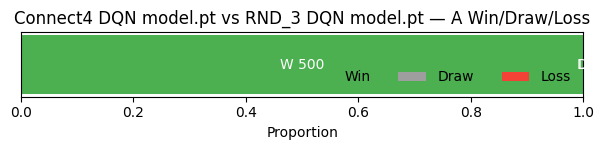

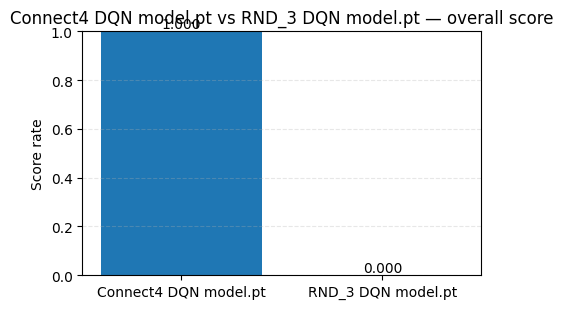

In [6]:
plot_winrate_bar(res)

In [7]:
append_h2h_to_excel(res)

In [8]:
end_time = time.time()
total_elapsed = (end_time - begin_start_time) / 60
print(f"Evaluation completed in {total_elapsed:.1f} minutes")

Evaluation completed in 0.4 minutes
